<a href="https://colab.research.google.com/github/MayurBhama/21-Data-Science-Projects/blob/main/Project_01_Titanic_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: Exploratory Data Analysis (EDA) on the Titanic Dataset
"""
**Assignment Objective:** To perform a comprehensive, step-by-step exploratory data analysis to understand the key factors that influenced survival on the Titanic and
"""


In [ ]:
#Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Set plot style
sns.set(style = "whitegrid")

In [ ]:
!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 5.06 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
titanic_data = pd.read_csv("/content/21-Days-21-Projects-Dataset/Datasets/Titanic-Dataset.csv")

In [ ]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
titanic_data.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [ ]:
titanic_data.shape

(891, 12)

In [ ]:
print("\n Dataset Information")
titanic_data.info()


 Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Interpretation:
-The dataset contain 891 entries (passengers) and 12 columns
- In the dataset we have 5(categrorical columns), 7(numerical columns)
- Missing Values Identified: Age, Cabin and Embarked have missing values. Cabin is missing almost 77% of data, which requires a special attention.

In [ ]:
print("\n Dataset Description")
titanic_data.describe()


 Dataset Description


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

##Interpretation:
- **Survived:** About 38.4% of passengers in this dataset survived.
- **Age:** The age ranges from ~5 months to 80 years, with an average age of about 30.
- **Fare:** The fare is highly skewed, with a mean of $32 but a median of only $14.45. The maximum fare is over $512, indicating the presence of extreme outliers.

In [ ]:
#Applying loop to calculate the value_count of each columns
for i in titanic_data.columns:
  print(f"{i} : {titanic_data[i].value_counts()}\n\n")

PassengerId : PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64


Survived : Survived
0    549
1    342
Name: count, dtype: int64


Pclass : Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Name : Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64


Sex : Sex
male   

### Step 3: Data Cleaning

Before analysis, we must handle the missing values we identified.

In [ ]:
print("\n Missing values in the data")
titanic_data.isna().sum()


 Missing values in the data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Interpretation:
- Age: Age column has around 20% missing values.
- Cabin: Cabin column has around 77% missing values which is a challenging thing.
- Embarked: Embarked has only 2 missing values.

In [ ]:
#Missing value treatment of Age columns
median = titanic_data['Age'].median()
titanic_data['Age'] = titanic_data['Age'].fillna(median)

In [ ]:
print("\n Checking missing value in age columns")
titanic_data['Age'].isna().sum()


 Checking missing value in age columns


np.int64(0)

In [ ]:
#Missing value treatment of Embarked columns
mode_value = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(mode_value)

In [ ]:
print("\n Checking missing value in embarked columns")
titanic_data['Embarked'].isnull().sum()


 Checking missing value in embarked columns


np.int64(0)

In [ ]:
#Missing value treatment of Cabin columns
titanic_data["Has Cabin"]= titanic_data["Cabin"].notna().astype(int) #1 for cabin, 0 for not
titanic_data.drop('Cabin', axis = 1, inplace = True)

In [ ]:
titanic_data["Has Cabin"].value_counts()

Has Cabin
0    687
1    204
Name: count, dtype: int64

In [ ]:
print("Missing values after Embarked cleaning:")
print(titanic_data[['Age', 'Embarked', 'Has Cabin']].isna().sum())

Missing values after Embarked cleaning:
Age          0
Embarked     0
Has Cabin    0
dtype: int64


In [ ]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has Cabin      0
dtype: int64

### Step 4: Univariate Analysis

We analyze each variable individually to understand its distribution.


 Analyzing categorical features:


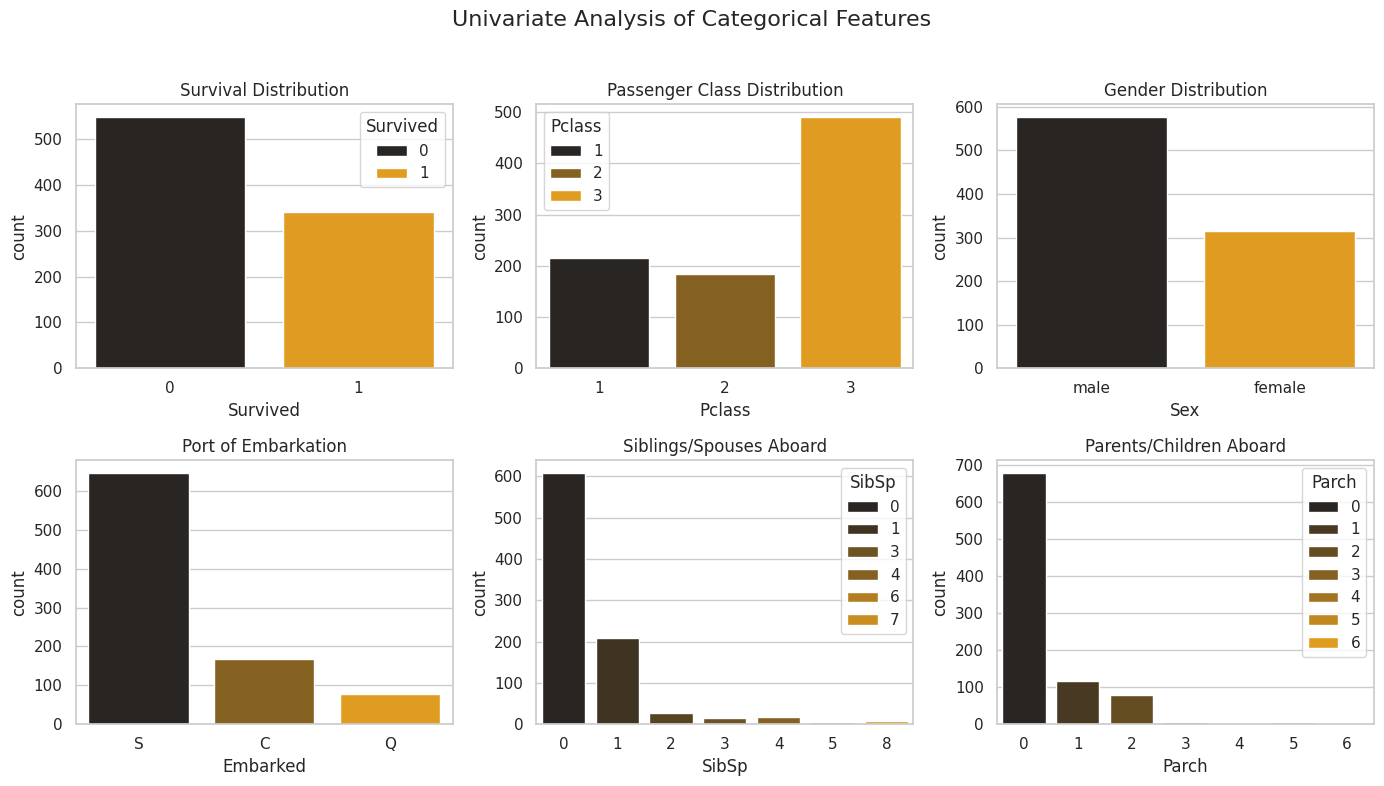

In [ ]:
#Univariate Analysis
print("\n Analyzing categorical features:")
fig, axes = plt.subplots(2,3, figsize = (14, 8))
fig.suptitle("Univariate Analysis of Categorical Features", fontsize = 16)

#Plotting categorical features
sns.countplot(ax = axes[0,0], x= 'Survived', data = titanic_data, color = 'orange', hue = 'Survived').set_title("Survival Distribution")
sns.countplot(ax=axes[0, 1], x='Pclass', data=titanic_data,color = 'orange',  hue = 'Pclass').set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=titanic_data,color = 'orange', hue = 'Sex').set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=titanic_data, color = 'orange', hue = 'Embarked').set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=titanic_data, color = 'orange',  hue = 'SibSp').set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=titanic_data,color = 'orange', hue = 'Parch' ).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Key Insights (Categorical):**
- **Survival:** Most passengers (over 500) did not survive.
- **Pclass:** The 3rd class was the most populated, followed by 1st and then 2nd.
- **Sex:** There were significantly more males than females.
- **Embarked:** The vast majority of passengers embarked from Southampton ('S').
- **SibSp & Parch:** Most passengers traveled alone.


Analyzing numerical features:


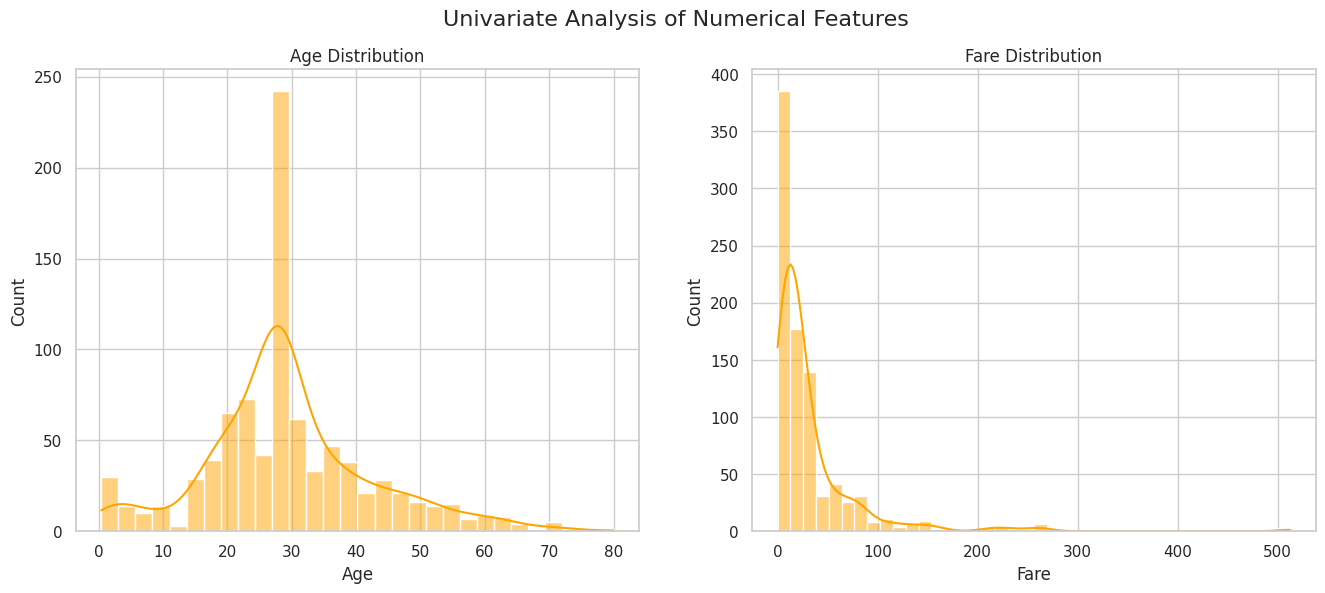

In [ ]:
print("\nAnalyzing numerical features:")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

#Age distribution
sns.histplot(ax=axes[0], data=titanic_data, x='Age', kde=True, bins=30, color = "orange").set_title('Age Distribution')

#Fare distribution
sns.histplot(ax=axes[1], data=titanic_data, x='Fare', kde=True, bins=40, color = "orange").set_title('Fare Distribution')

plt.show()

**Key Insights (Numerical):**
- **Age:** The distribution peaks around the 20-30 age range. Remember we filled missing values with the median (28), which contributes to the height of that central bar.
- **Fare:** The distribution is heavily right-skewed, confirming that most tickets were cheap, with a few very expensive exceptions.

### Step 5: Bivariate Analysis

Here, we explore the relationship between two variables. Our primary focus will be on how each feature relates to our target variable, `Survived`.

Bivariate Analysis: Feature vs. Survival


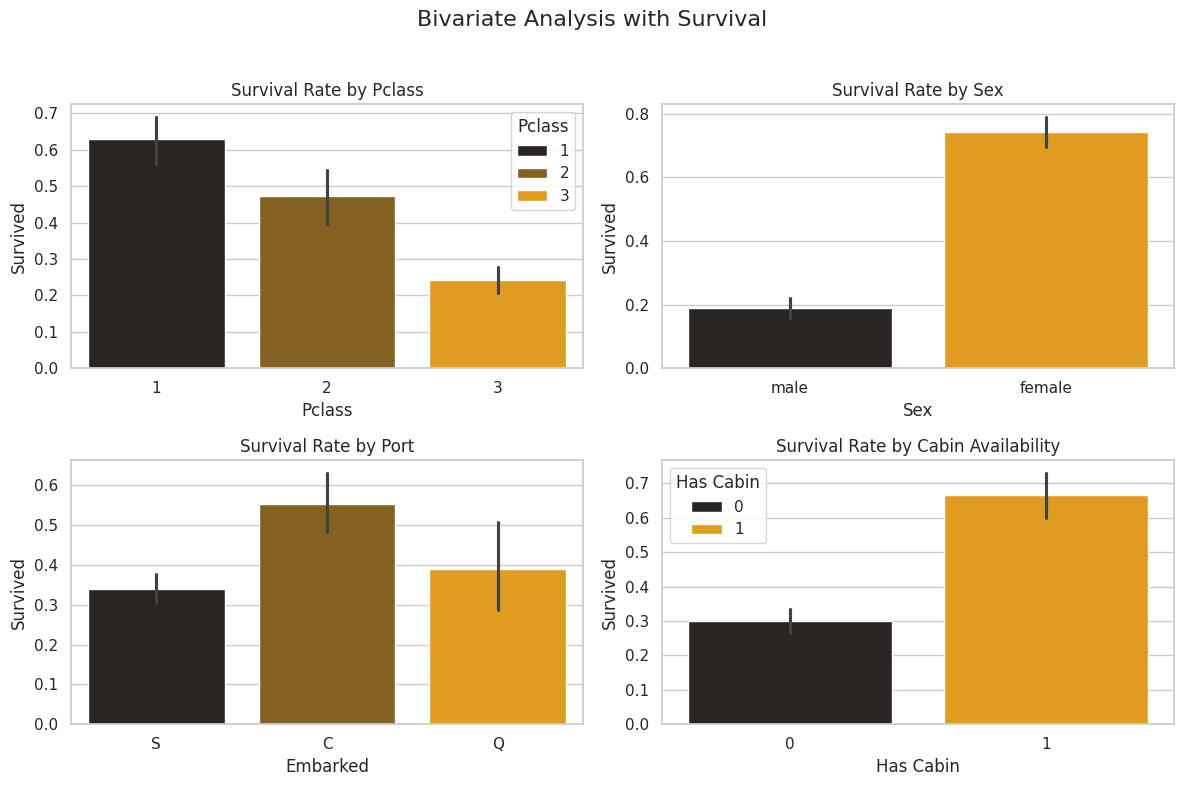

In [ ]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=titanic_data, color = 'orange', hue = "Pclass").set_title('Survival Rate by Pclass')

# Sex vs. Survived
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=titanic_data,color = 'orange', hue = "Sex").set_title('Survival Rate by Sex')

# Embarked vs. Survived
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=titanic_data, color = 'orange', hue = "Embarked" ).set_title('Survival Rate by Port')

# Has_Cabin vs. Survived
sns.barplot(ax=axes[1, 1], x='Has Cabin', y='Survived', data=titanic_data, color = 'orange', hue = "Has Cabin").set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Key Insights (Bivariate):**
- **Pclass:** A clear trend emerges: 1st class passengers had a >60% survival rate, while 3rd class passengers had less than 25%.
- **Sex:** This is the strongest predictor. Females had a survival rate of ~75%, while males had a rate below 20%.
- **Embarked:** Passengers embarking from Cherbourg ('C') had a higher survival rate than those from the other ports.
- **Has_Cabin:** Passengers with a registered cabin number had a much higher survival rate. This is likely correlated with being in 1st class.

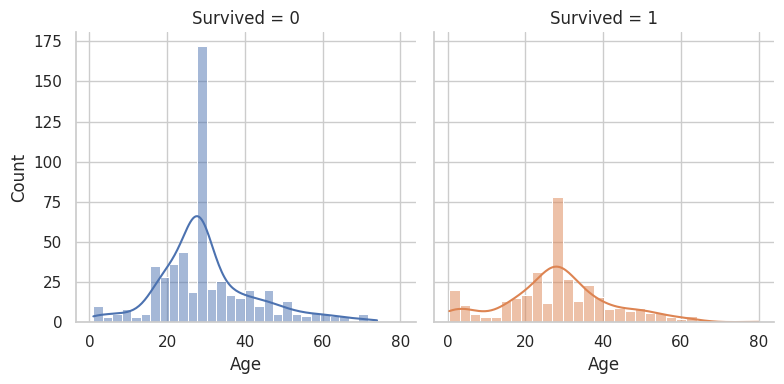

In [ ]:
#Age vs Survival
g = sns.FacetGrid(titanic_data, col='Survived', height=4, hue = "Survived")
g.map(sns.histplot, 'Age', bins=30, kde = True)
plt.show()

**Key Insight (Age vs. Survival):**
- Infants and young children had a higher probability of survival.
- A large portion of non-survivors were young adults (20-40).
- The oldest passengers (80 years) did not survive.

#### Deeper Dive: Outlier Analysis for 'Fare'
The `.describe()` function and histogram showed that `Fare` has extreme outliers. Let's visualize this clearly with a box plot.

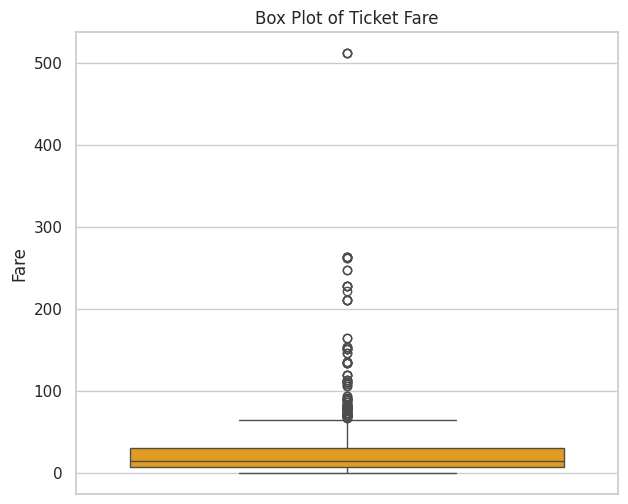

In [ ]:
plt.figure(figsize=(7, 6))
sns.boxplot(y='Fare', data=titanic_data, color = 'orange')
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

**Observation:**
The box plot confirms the presence of significant outliers. Most fares are concentrated below \$100, but there are several fares extending far beyond, with some even exceeding \$500. These are likely first-class passengers who booked luxurious suites. For some machine learning models, handling these outliers (e.g., through log transformation) would be an important step.

### Step 6: Feature Engineering
Now, we'll create new features from the existing ones to potentially uncover deeper insights and provide more useful information for a machine learning model.

In [ ]:
#Create a FamilySize feature
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

#Create an "IsALone" feature
titanic_data['IsAlone'] = 0
titanic_data.loc[titanic_data['FamilySize'] == 1, 'IsAlone'] = 1

In [ ]:
print("Created 'FamilySize' and 'IsAlone' features:")
titanic_data[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1

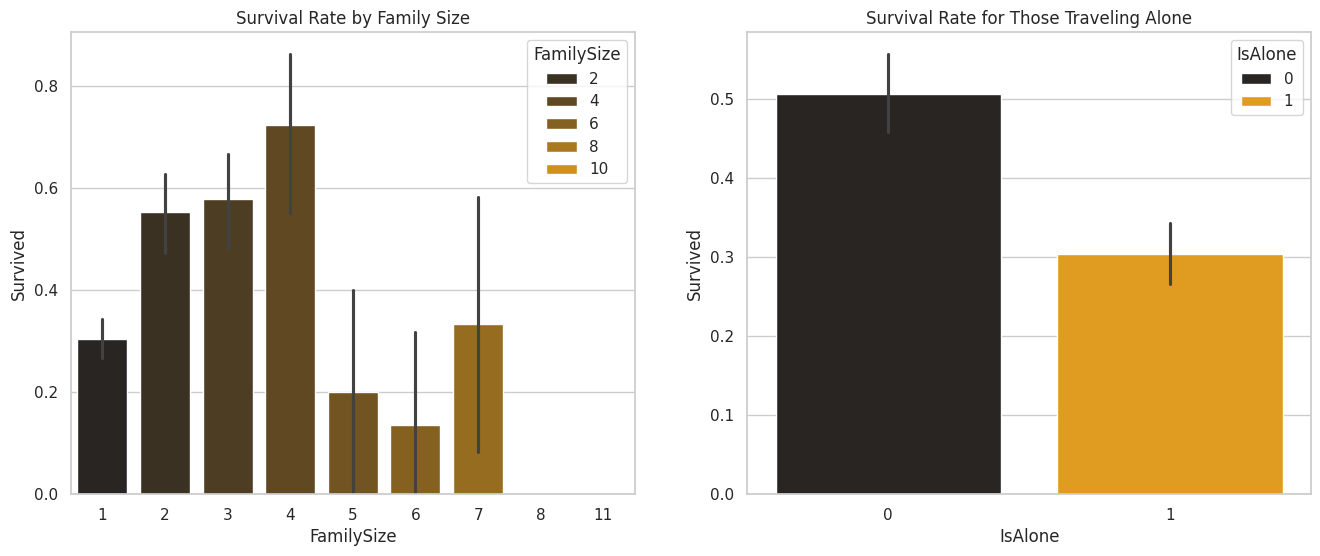

In [ ]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=titanic_data, color = 'orange', hue = 'FamilySize').set_title('Survival Rate by Family Size')

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=titanic_data, color = 'orange', hue = 'IsAlone').set_title('Survival Rate for Those Traveling Alone')

plt.show()

**Insight:**
- Passengers who were alone (`IsAlone=1`) had a lower survival rate (~30%) than those in small families.
- Small families of 2 to 4 members had the highest survival rates.
- Very large families (5 or more) had a very poor survival rate. This might be because it was harder for large families to stay together and evacuate.

In [ ]:
#Extract title from the name column
titanic_data['Title'] = titanic_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand = False)

print("Extracted Titles")
titanic_data['Title'].value_counts()

Extracted Titles


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [ ]:
titanic_data['Title'] = titanic_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_data['Title'] = titanic_data['Title'].replace('Mlle', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Ms', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Mme', 'Mrs')

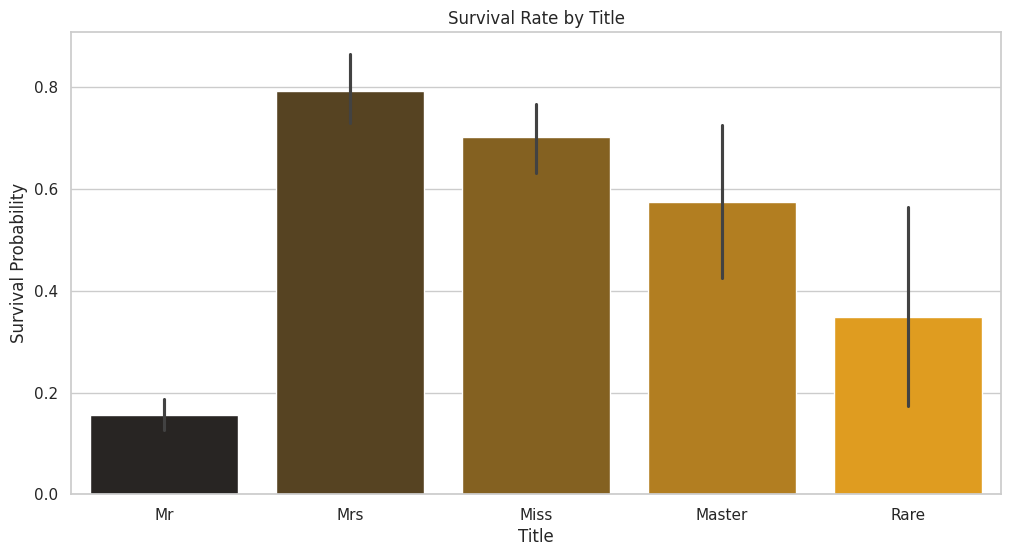

In [ ]:
# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=titanic_data, color ='orange', hue = 'Title')
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

**Insight:**
The `Title` feature gives us powerful information. 'Mrs' and 'Miss' (females) had high survival rates. 'Mr' (males) had a very low survival rate. 'Master' (young boys) had a significantly higher survival rate than 'Mr', reinforcing the 'children first' idea. The 'Rare' titles, often associated with nobility or status, also had a mixed but generally higher survival rate than common men.

### Step 7: Multivariate Analysis

Now we explore interactions between multiple variables simultaneously, including our new engineered features.

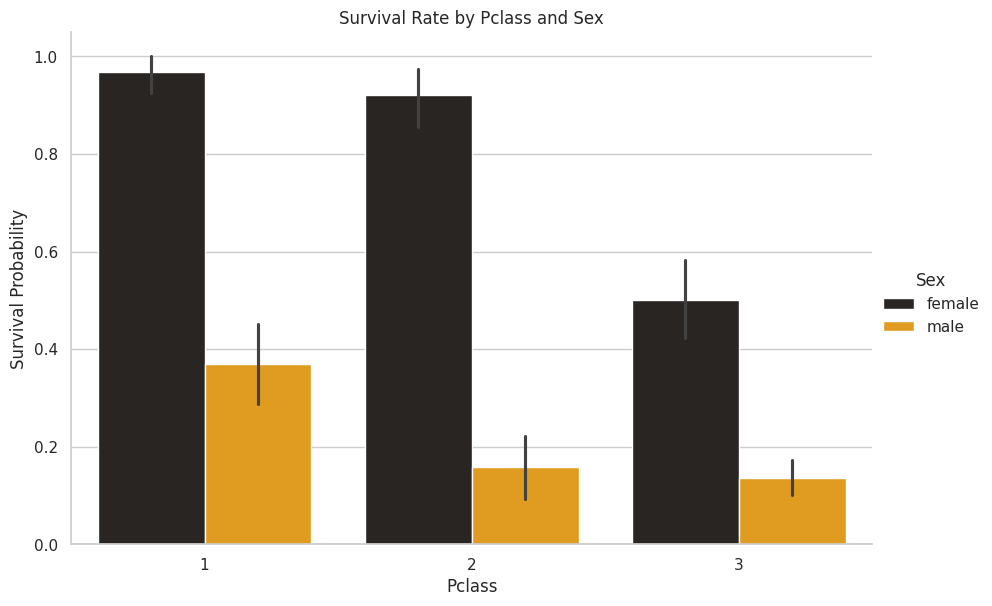

In [ ]:
# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', y='Survived',color = 'orange',  hue='Sex', data=titanic_data, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

# Insights: Females in all classes had a significantly higher survival rate than males.

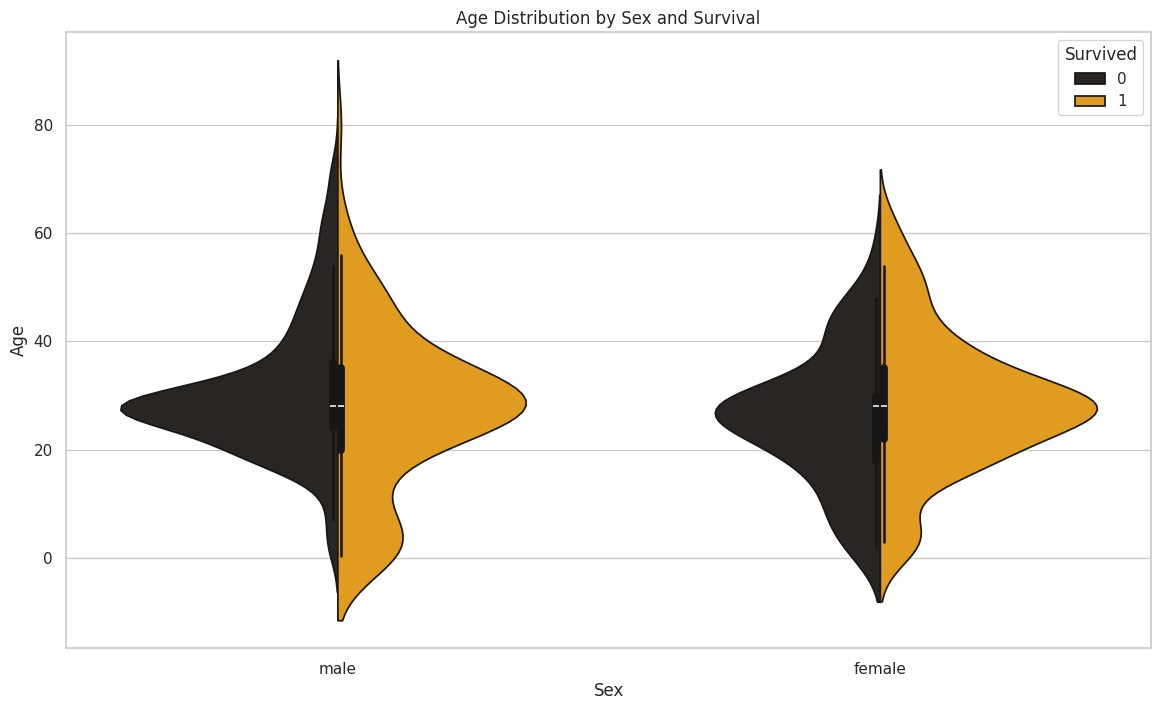

In [ ]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_data, split=True, color = 'orange')
plt.title('Age Distribution by Sex and Survival')
plt.show()

**Insight from Violin Plot:**
- For males, the peak of the distribution for survivors (orange) is at a very young age (children), while the peak for non-survivors is in the 20-30 range.
- For females, the distribution of survivors is much broader, indicating that females of most ages had a good chance of surviving.

### Step 8: Correlation Analysis

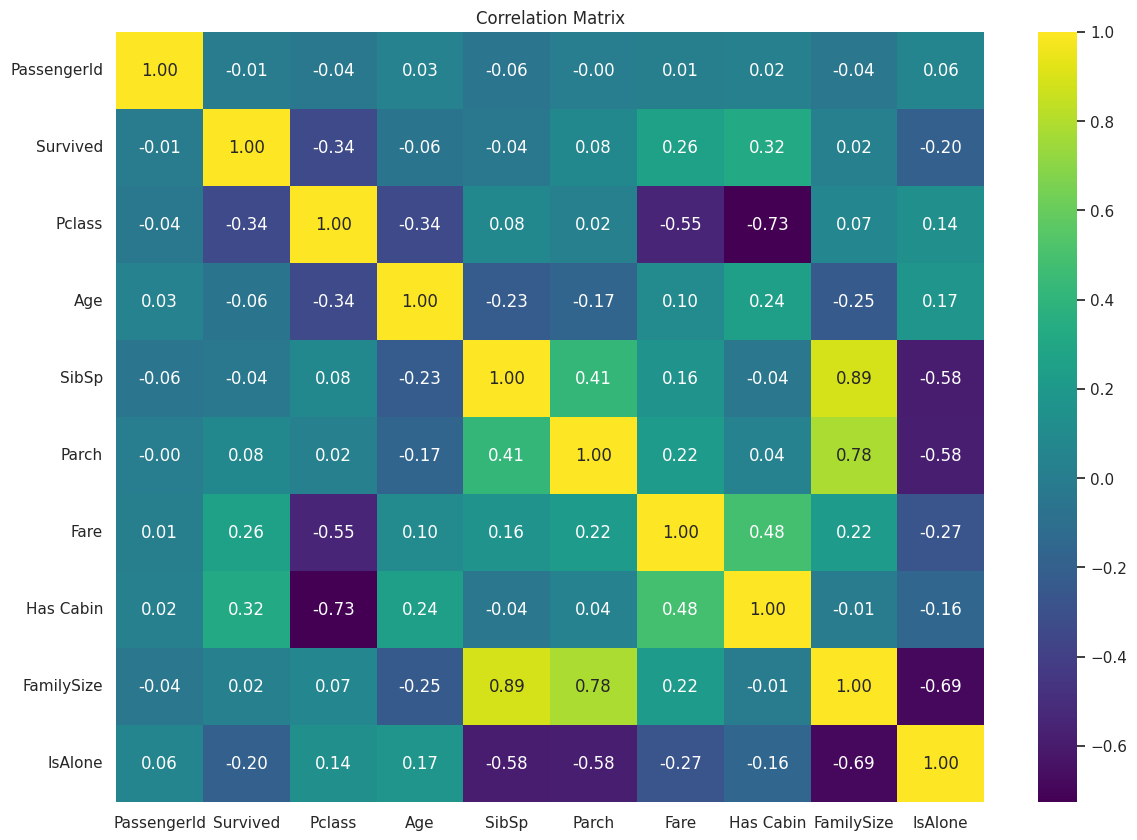

In [ ]:
plt.figure(figsize = (14, 10))
numerical_cols = titanic_data.select_dtypes(include = np.number)
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'viridis', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

**Interpretation of the Heatmap:**
- **`Survived`** has a notable positive correlation with `Fare` and `Has_Cabin`, and a negative correlation with `Pclass` and our new `IsAlone` feature.
- **`Pclass`** and `Fare` are strongly negatively correlated, which makes sense (1st class = high fare).
- Our new **`FamilySize`** feature is composed of `SibSp` and `Parch`, so it's highly correlated with them by definition.

In [ ]:
!pip install ydata-profiling -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(titanic_data, title = "Titanic Dataset Profile Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 23.70it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Save the report to an HTML file
profile.to_file("titanic_data_Y_profiling.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]